In [1]:
import importlib
import experiment
import plotting

# Reload the modules after editing
importlib.reload(experiment)
importlib.reload(plotting)

# Re-import the functions if necessary
from experiment import sensitivity_sweep
from plotting import plot_results_2cols

small variance
high wE
inhibition stabilizes, decreases variance
task dist - deter prl switch

In [2]:
def default_params():
    """
    Defines the default parameters for the experiment.

    Returns:
        dict: A dictionary containing the default parameter values.
    """
    params = {
        "time_steps": 10000,          # Total number of time steps in the experiment
        "task_dist": "DetPRL",        # Type of task distribution (e.g., Deterministic PRL)
        "init_reward_means": ([1, 0], [1, 0]),  # Initial reward means for each task
        "init_reward_probs": (0.8, 0.2),  # Initial probabilities for task rewards
        "task_reward_probs": None,   # Probabilities for rewards in tasks (optional)
        "n_tasks": 10,               # Number of tasks in the experiment
        "reward_prob": 1.0,          # Probability of receiving a reward
        "reward_var": 0.5,           # Variance of reward noise
        "n_trials": 20,              # Number of trials to average results
        "wI": [0.0, 0.01, -0.01],    # List of exploitative weight values for sensitivity sweeps
        "wE": 0.2,                   # Exploratory weight for policy updates
        "alpha": 0.01,               # Learning rate for value updates
        "tau": 0.01                  # Entropy regularization coefficient
    }
    return params


# Role of Inhibition in Adaptive Learning:
 Showing the policy performance for two settings of the
policy Q-value precision (scaling, policy learning rate) wE , high (Top) and low (Bottom), and two choices of
inhibition strength wI , positive (Left) and negative (Right), averaged over 20 trials
 Shades denote standard
deviation. (Top-Bottom) Uncertainty elicited by continual learning and reward noise is amplified by high
policy precision (red baseline)


 (Top) This effect is stabilized by positive inhibition (Left) and amplified by
negative inhibition (Right)
 

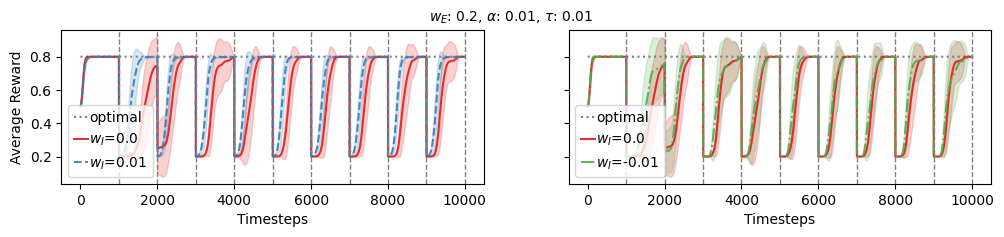

In [3]:
# Load default parameters
params = default_params()

# Run the sensitivity analysis, sweeping over wI
histories, environment = sensitivity_sweep(params, sweep_over="wI")

# Plot the results
plot_results_2cols(params, histories, environment, "avg_reward")

# Effect of the Policy Precision wE on Entropy
 Showing the policy entropy for two settings of the precision wE (Top-Bottom) and two settings of positive and negative inhibition (Left-Right)

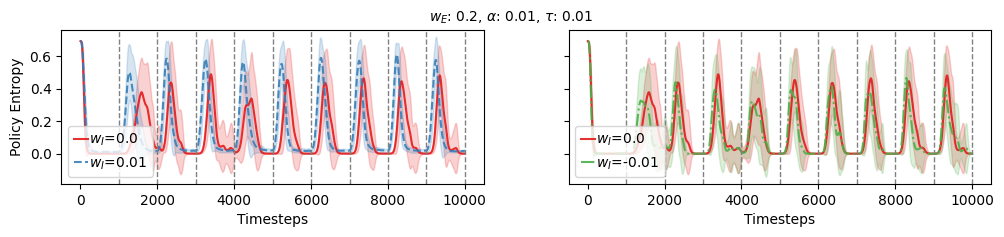

In [4]:
plot_results_2cols(params, histories, environment, "entropy")

# Opposing Q-value Dynamics lead to Pessimism
 Showing the expected values VE = Eπ [QE (A)]
and VI = Eπ [QI (A)] for the setting in Fig 6.6(Top), averaged over 20 trials
 Shades denote standard deviation.
 
(Top-Left) Positive inhibition has a similar effect to relaxing the policy precision (red baseline), leading to
more stable policy dynamics, which is suitable in settings of high uncertainty
 
(Bottom-Left) This effect
emerges through the interaction with the inhibitory bias carried out by the auxiliary variables. (Right)
Contrary, the precision is amplified by negative inhibition, which leads to more competition between
opposing decisions.

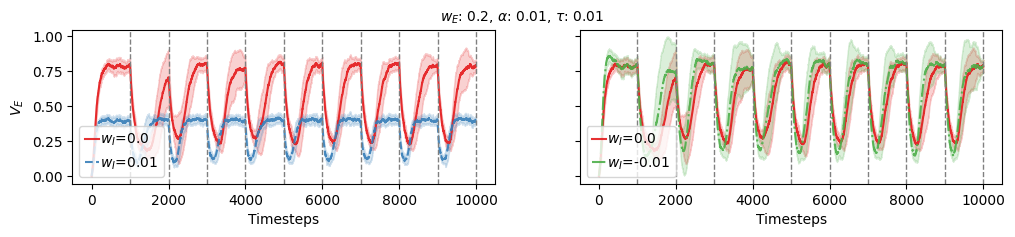

In [5]:
plot_results_2cols(params, histories, environment, "V_E")

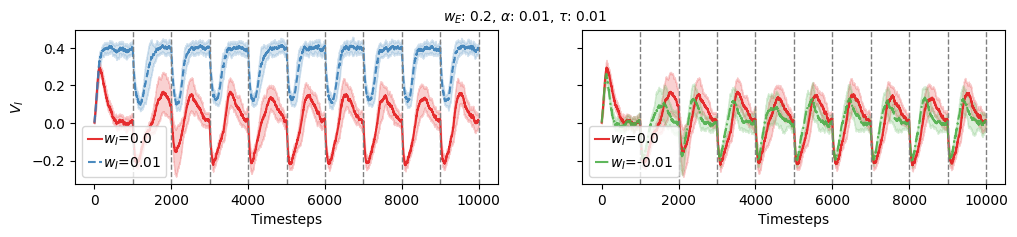

In [6]:
plot_results_2cols(params, histories, environment, "V_I")